# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Farrel Bima Haryomukti]
- **Email:** [farrelharyomukti@gmail.com]
- **ID Dicoding:** [farrel_haryomukti]

## Menentukan Pertanyaan Bisnis

- Jenis polutan apa yang paling banyak tersebar dalam periode 2013 - 2017?
- Apakah kandungan PM2.5 dan PM10 di udara berpengaruh dengan suhu udara?
- Konsentrasi polutan PM2.5 dan PM10 tertinggi ditemukan dimana?
- Apakah PM2.5 dan PM10 berkorelasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
import warnings
import os
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
data_dir = '/content/beijing-air-quality'

df_list = [] #List untuk menyimpan dataframe

# Mengiterasi semua file dan menambahkannya ke dalam df_list
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        temp_df = pd.read_csv(os.path.join(data_dir, file))
        temp_df['FileName'] = file.replace('.csv', '')
        df_list.append(temp_df)

all_df = pd.concat(df_list, ignore_index=True)

In [3]:
# Cek all_df
print(all_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  \
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan   
1  1023.2 -18.2   0.0    N   4.7  Guanyuan   
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan   
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan   
4  1025.2 -19.5   0.0    N   2.0  Guanyuan   

                               FileName  
0  PRSA_Data_Guanyuan_20130301-20170228  
1  PRSA_Data_Guanyuan_20130301-20170228  
2  PRSA_Data_Guanyuan_20130301-20170228  
3  PRSA_Data_Guanyuan_20130301-20170228  
4  PRSA_Data_Guanyuan_20130301-20170228  


In [4]:
# Verifikasi dataframe berdasar kolom station

vf_df = all_df[all_df['station'] == 'Wanshouxigong']
print(vf_df)

           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
350640      1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   
350641      2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0   
350642      3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0   
350643      4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN   
350644      5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0   
...       ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
385699  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
385700  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
385701  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
385702  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
385703  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  \
3

**Insight:**
- Dataset berisi data tentang laporan kandungan polutan dari 12 stasiun monitor polutan udara periode 2013 sampai 2017.
- Data polutan terlapor setiap jam selama periode waktu yang disebutkan.

### Assessing Data

In [5]:
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        420768 non-null  int64  
 1   year      420768 non-null  int64  
 2   month     420768 non-null  int64  
 3   day       420768 non-null  int64  
 4   hour      420768 non-null  int64  
 5   PM2.5     412029 non-null  float64
 6   PM10      414319 non-null  float64
 7   SO2       411747 non-null  float64
 8   NO2       408652 non-null  float64
 9   CO        400067 non-null  float64
 10  O3        407491 non-null  float64
 11  TEMP      420370 non-null  float64
 12  PRES      420375 non-null  float64
 13  DEWP      420365 non-null  float64
 14  RAIN      420378 non-null  float64
 15  wd        418946 non-null  object 
 16  WSPM      420450 non-null  float64
 17  station   420768 non-null  object 
 18  FileName  420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory u

In [6]:
print(all_df.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

In [7]:
print(all_df.isnull().sum())

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
FileName        0
dtype: int64


**Insight:**
- Terdapat 17 kolom dalam setiap dataset stasiun monitoring udara, 18 pada all_df.
- Seluruh kolom data memiliki variable non-null.
- Ditemukan beberapa missing value dalam kolom jenis polutan. Missing value perlu ditangani.

### Cleaning Data

In [8]:
# Membuat kolom datetime dengan menggunakan data dari kolom year, month, day, hour
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])

all_df.set_index('datetime', inplace=True)

In [9]:
# Menghapus kolom year, month, day, hour
all_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [10]:
print(all_df.head())

                     No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
datetime                                                                      
2013-03-01 00:00:00   1    4.0   4.0  14.0  20.0  300.0  69.0  -0.7  1023.0   
2013-03-01 01:00:00   2    4.0   4.0  13.0  17.0  300.0  72.0  -1.1  1023.2   
2013-03-01 02:00:00   3    3.0   3.0  10.0  19.0  300.0  69.0  -1.1  1023.5   
2013-03-01 03:00:00   4    3.0   6.0   7.0  24.0  400.0  62.0  -1.4  1024.5   
2013-03-01 04:00:00   5    3.0   6.0   5.0  14.0  400.0  71.0  -2.0  1025.2   

                     DEWP  RAIN   wd  WSPM   station  \
datetime                                               
2013-03-01 00:00:00 -18.8   0.0  NNW   4.4  Guanyuan   
2013-03-01 01:00:00 -18.2   0.0    N   4.7  Guanyuan   
2013-03-01 02:00:00 -18.2   0.0  NNW   5.6  Guanyuan   
2013-03-01 03:00:00 -19.4   0.0   NW   3.1  Guanyuan   
2013-03-01 04:00:00 -19.5   0.0    N   2.0  Guanyuan   

                                                 File

In [11]:
# Menginterpolasi missing value pada kolom polutan
all_df.interpolate(method='time', inplace=True)

In [12]:
print(all_df.isnull().sum())

No             0
PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd          1822
WSPM           0
station        0
FileName       0
dtype: int64


In [13]:
# Mengisi missing value kolom wd
all_df['wd'].fillna(all_df['wd'].mode()[0], inplace=True)

In [14]:
print(all_df.isnull().sum())

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
FileName    0
dtype: int64


In [15]:
all_df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

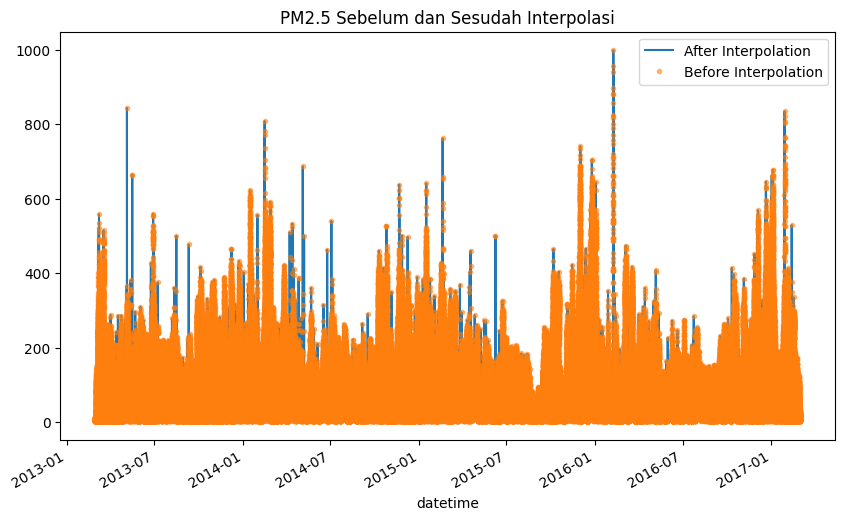

In [16]:
# Mengecek efek sebelum dan sesudah interpolasi
plt.figure(figsize=(10, 6))
all_df['PM2.5'].plot(label='After Interpolation')
df_ori = all_df['PM2.5'].plot(style='.', alpha=0.5, label='Before Interpolation')
plt.legend()
plt.title('PM2.5 Sebelum dan Sesudah Interpolasi')
plt.show

**Insight:**
- Menghapus kolom year, month, day, & hour lalu mengubahnya ke dalam kolom datetime untuk memudahkan proses analisis dan visualisasi kedepannya.
- Missing value pada kolom polutan diurus dengan metode interpolasi karena untuk menjaga tren pada data. Data tersebut berpola time-series, per jam dalam kurun waktu 4 tahun.
- Mengacu pada visualisasi, sebelum dilakukan interpolasi terdapat beberapa data poin yang terlihat terpisah. Namun, setelah dilakukan interpolasi data poin yang terpisah menjadi terlihat terhubung.

## Exploratory Data Analysis (EDA)

### Explore All Data

In [17]:
print(all_df.describe())

                  No          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000      79.847895     104.840925      15.867672   
std     10122.116943      81.044213      92.438139      21.701634   
min         1.000000       2.000000       2.000000       0.285600   
25%      8766.750000      20.000000      36.000000       3.000000   
50%     17532.500000      55.000000      82.000000       7.000000   
75%     26298.250000     111.000000     145.000000      20.000000   
max     35064.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       50.603672    1232.963272      57.027213      13.531804   
std        35.127713    1165.967328      56.599737      11.437839   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.0000

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Berdasarkan dataframe, jenis polutan apa yang paling mendominasi?

In [18]:
polutan = all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
polutan_mean = polutan.mean()

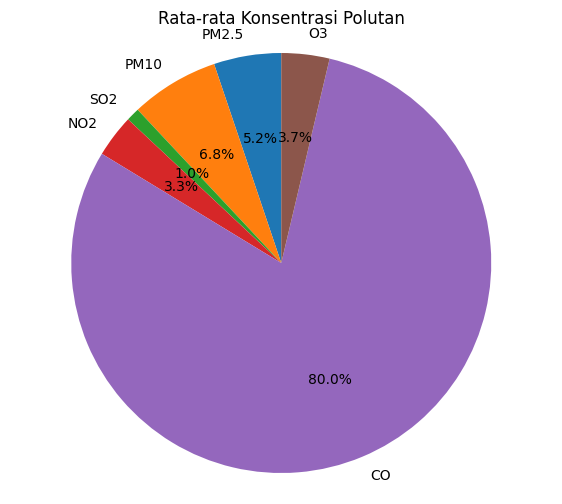

In [19]:
# Memvisualisasikan Seluruh Polutan Dengan Pie Chart
plt.figure(figsize=(7, 6))
plt.pie(polutan_mean, labels=polutan_mean.index, autopct='%1.1f%%', startangle=90)
plt.title('Rata-rata Konsentrasi Polutan')
plt.axis('equal') # biar bundar
plt.show()

### Pertanyaan 2:
- Apakah ada keterkaitan antara suhu dengan kandungan polutan PM2.5 dan PM10?

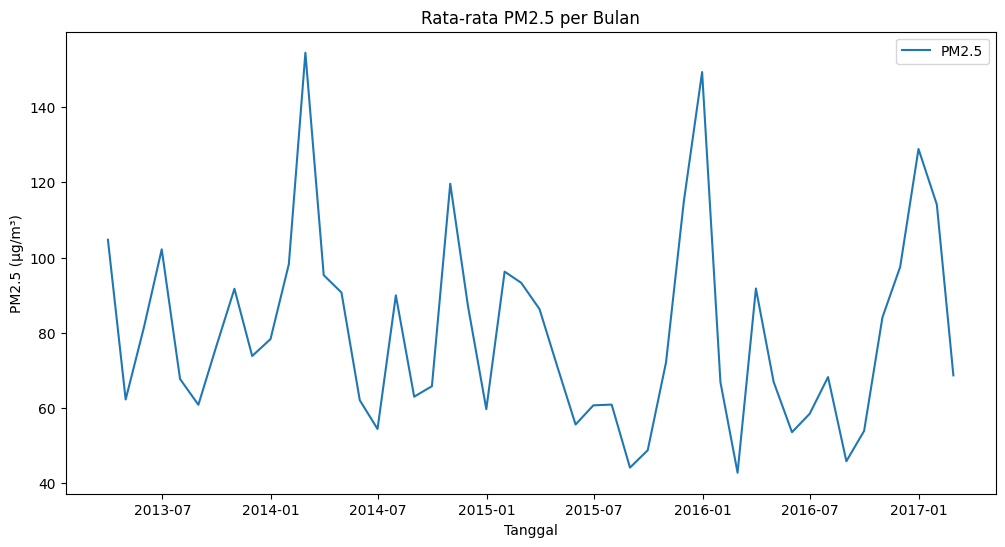

In [20]:
# Mengubah kolom PM2.5 menjadi numerik
# all_df['PM2.5'] = pd.to_numeric(all_df['PM2.5'], errors='coerce')

pm25_month_avg = all_df[['PM2.5']].resample('M').mean()

# PM2.5
plt.figure(figsize=(12,6))
plt.plot(pm25_month_avg.index, pm25_month_avg['PM2.5'], label='PM2.5')
plt.title('Rata-rata PM2.5 per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()

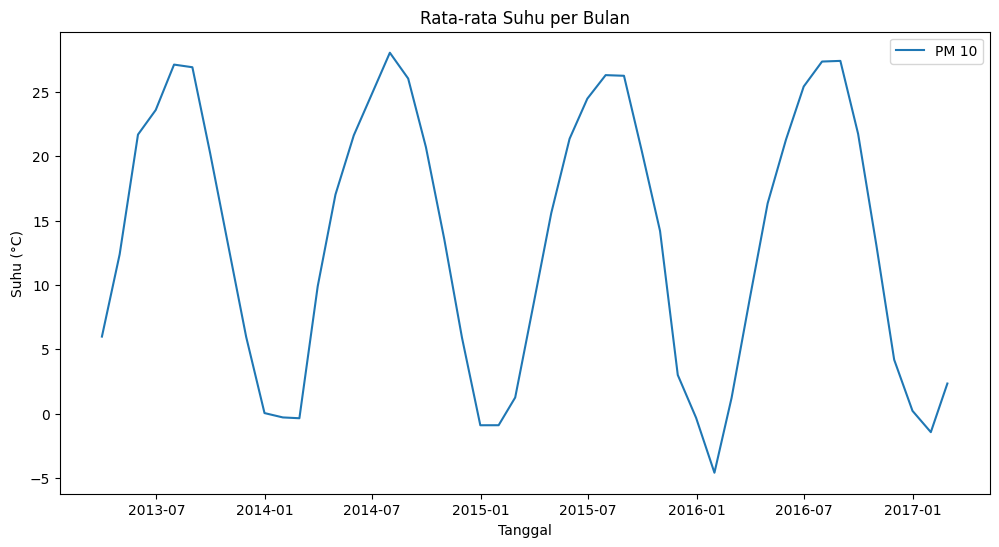

In [21]:
temp_month_avg = all_df[['TEMP']].resample('M').mean()

# Suhu
plt.figure(figsize=(12,6))
plt.plot(temp_month_avg.index, temp_month_avg['TEMP'], label='PM 10')
plt.title('Rata-rata Suhu per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.show()

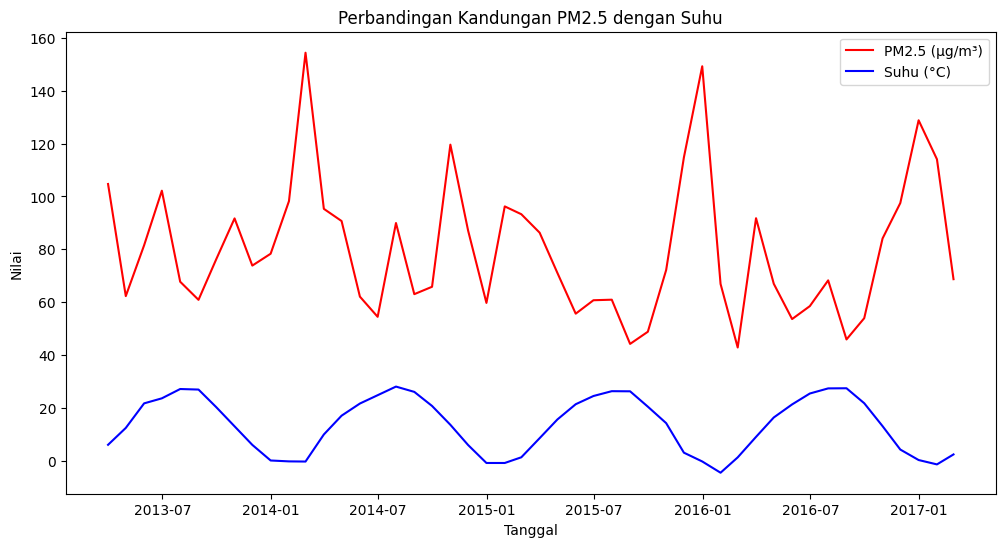

In [22]:
# Perbandingan PM2.5 dengan Suhu
plt.figure(figsize=(12,6))
plt.plot(pm25_month_avg.index, pm25_month_avg['PM2.5'], color='red', label='PM2.5 (µg/m³)')
plt.plot(temp_month_avg.index, temp_month_avg['TEMP'], color='blue', label='Suhu (°C)')
plt.title('Perbandingan Kandungan PM2.5 dengan Suhu')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

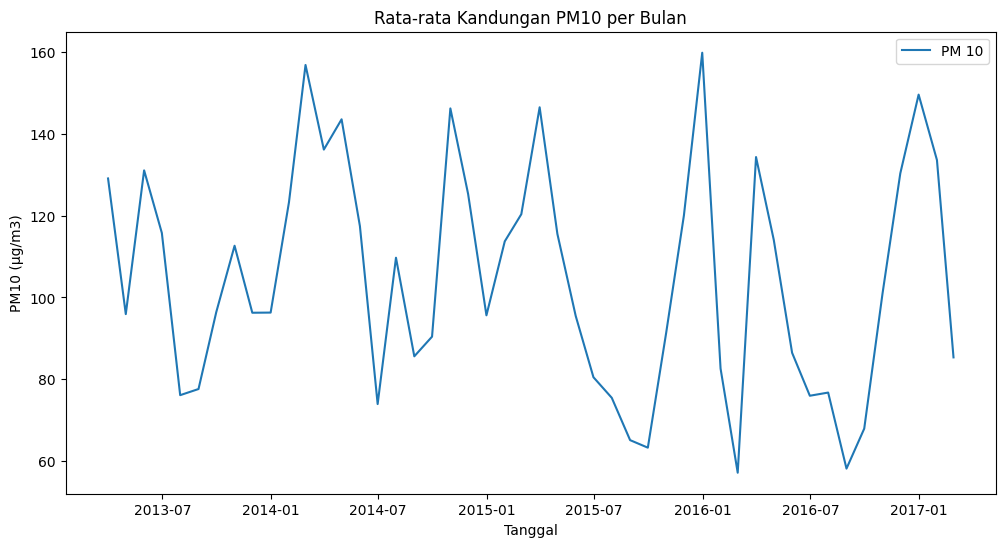

In [23]:
pm10_month_avg = all_df[['PM10']].resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(pm10_month_avg.index, pm10_month_avg['PM10'], label='PM 10')
plt.title('Rata-rata Kandungan PM10 per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('PM10 (µg/m3)')
plt.legend()
plt.show()

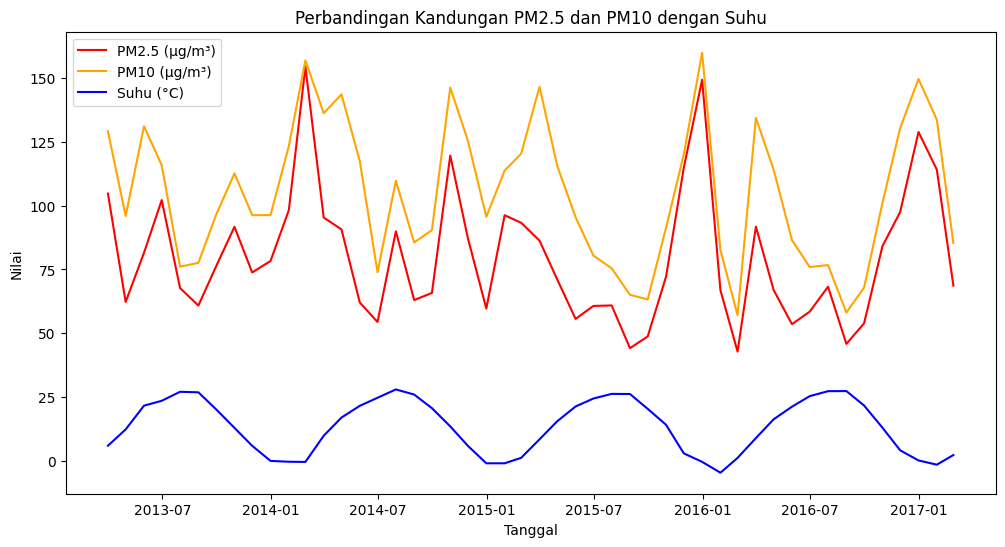

In [24]:
plt.figure(figsize=(12,6))
plt.plot(pm25_month_avg.index, pm25_month_avg['PM2.5'], color='red', label='PM2.5 (µg/m³)')
plt.plot(pm10_month_avg.index, pm10_month_avg['PM10'], color='orange', label='PM10 (µg/m³)')
plt.plot(temp_month_avg.index, temp_month_avg['TEMP'], color='blue', label='Suhu (°C)')
plt.title('Perbandingan Kandungan PM2.5 dan PM10 dengan Suhu')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

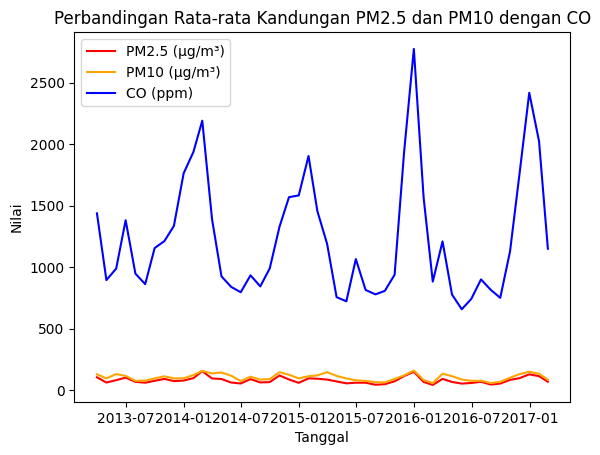

In [25]:
co_month_avg = all_df[['CO']].resample('M').mean()

plt.plot(pm25_month_avg.index, pm25_month_avg['PM2.5'], color='red', label='PM2.5 (µg/m³)')
plt.plot(pm10_month_avg.index, pm10_month_avg['PM10'], color='orange', label='PM10 (µg/m³)')
plt.plot(co_month_avg.index, co_month_avg['CO'], color='blue', label='CO (ppm)')
plt.title('Perbandingan Rata-rata Kandungan PM2.5 dan PM10 dengan CO')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

**Insight:**
- Polutan CO mendominasi total jumlah polutan yang terkandung di udara, yaitu 80% dari total polutan.
- Pola tren PM2.5 dan PM10 hampir mirip walaupun PM10 memiliki rata-rata konsentrasi yang lebih tinggi dibanding PM 2.5 yang menandakan bahwa sumber polutan dari keduanya hampir sama.
- Konsentrasi polutan PM 2.5 dan PM 10 dengan suhu memiliki hubungan terbalik. Ketika rerata suhu menurun (musim dingin), rata-rata konsentrasi PM 2.5 dan PM 10 berada pada titik yang tinggi. Ini menandakan adanya peningkatan aktivitas pembakaran ketika musim dingin datang.

## Analisis Lanjutan (Opsional)

**Clustering**

In [26]:
# Menentukan feature untuk clustering
feature = polutan.values

# Standardisasi data
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

In [27]:
# K Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_feature)

KMeans(n_clusters=3, random_state=42)

In [28]:
# Menambahkan culster ke station
station_pol = all_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()
scaled_avg = scaler.transform(station_pol[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
clusters = kmeans.fit_predict(scaled_avg)

station_pol['Cluster'] = clusters

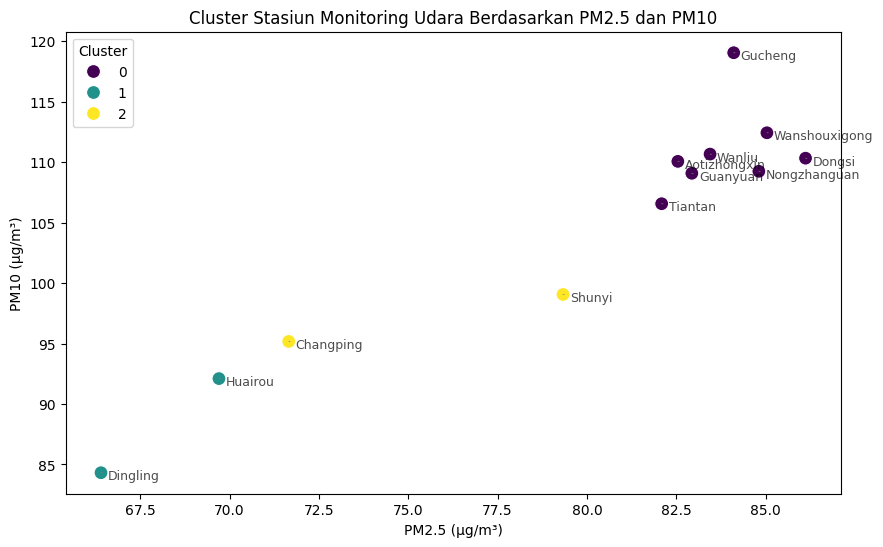

In [29]:
# Visualisasi Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=station_pol, x='PM2.5', y='PM10', hue='Cluster', palette='viridis', s=100)

# Menambahkan label nama stasiun
for i in range(station_pol.shape[0]):
    plt.annotate(station_pol['station'][i],
                 (station_pol['PM2.5'][i], station_pol['PM10'][i]),
                 textcoords="offset points",
                 xytext=(5,-5),
                 ha='left', fontsize=9, alpha=0.7,
                 arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title('Cluster Stasiun Monitoring Udara Berdasarkan PM2.5 dan PM10')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.legend(title='Cluster', loc='upper left')
plt.show()

**Insight**
- Terdapat 3 kluster berdasarkan tingkat konsentrasi PM2.5 dan PM10.
- Stasiun Gucheng, Wanshouxigong, Dongsi, Wanliu, Aotizhongxin, Nongzhanguan, Guanyuan, dan Tiantan memiliki tingkat konsentrasi PM2.5 dan PM10 yang tinggi, mencapai lebih dari 100 µg/m³ untuk PM10 dan diatas 80 µg/m³ untuk PM2.5.
- Stasiun Shunyi dan Changping termasuk ke dalam kluster menengah, dan Stasiun Huairou dan Dingling termasuk ke dalam kluster rendah.
- Jarak antara kluster berpolutan tinggi dengan rendah cukup jauh, ini menandakan lokasi antara kedua kluster tersebut saling berjauhan.

**Analisis Korelasi**

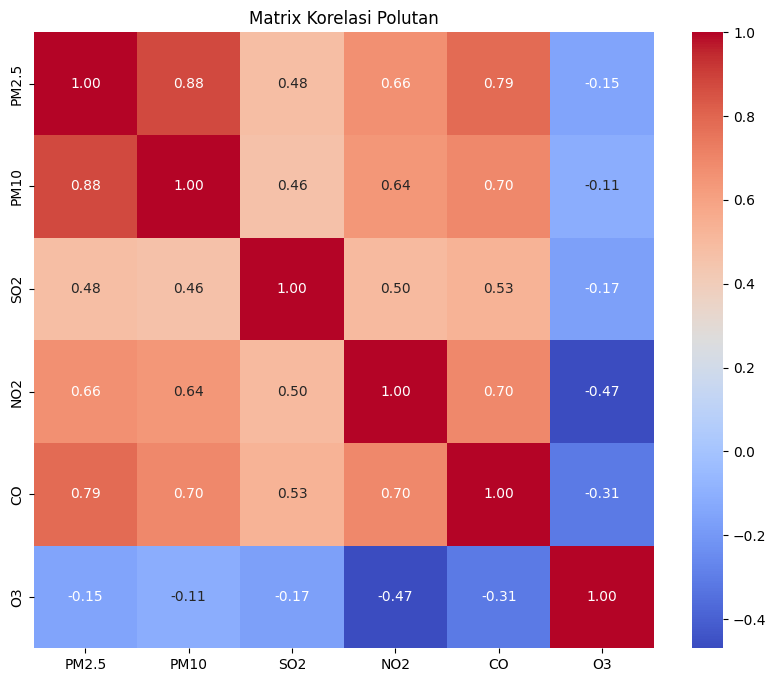

In [30]:
matrix_korelasi = polutan.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Korelasi Polutan')
plt.show()

**Insight**
- Sesuai dengan linechart di atas, PM2.5 dan PM10 memiliki nilai korelasi yang tinggi, yaitu 0.88. Ini menandakan keduanya berasal dari sumber yang hampir sama.
- Polutan CO juga memiliki nilai korelasi yang tinggi dengan polutan PM2.5 dan PM10.
- NO2 dan CO memiliki nilai korelasi positif dengan nilai 0.70.
- O3 tidak memiliki korelasi dengan polutan lainnya.



## Conclusion

- Conclution pertanyaan 1   
Jenis polutan CO menjadi polutan yang paling banyak tersebar di udara dengan persentase 80%.

- Conclution pertanyaan 2      
Kandungan PM2.5 dan PM10 memiliki hubungan terbalik dengan suhu udara. Ketika suhu udara mendingin, jumlah konsentrasi polutan tersebut meningkat. Sedangkan jika suhu udara meningkat, konsentrasi polutan tersebut justru menurun.

- Conclution pertanyaan 3   
Konsentrasi PM 2.5 dan PM 10 tertinggi ditemukan di Stasiun Gucheng, Wanshouxigong, Dongsi, Wanliu, Aotizhongxin, Nongzhanguan, Guanyuan, dan Tiantan. Rata-rata konsentrasi PM2.5 diatas 80 µg/m³, dan rata-rata konsentrasi PM10 lebih dari 100 µg/m³.

- Conclution pertanyaan 4   
Ya, PM2.5 dan PM10 memiliki nilai korelasi positif yang tinggi, yaitu 0.88. Ini menandakan kedua polutan tersebut memiliki pola yang hampir sama.



In [31]:
all_df.to_csv('all_df.csv', index=False)